# AIPI 590 - XAI | Assignment #04
### Description
### Your Name: Wilson Tseng

#### Assignment 4 - Interpretable ML II:
[GitHub Link](https://github.com/smilewilson1999/XAI/tree/e66c325e2253ac8d8fdefea19e8872392494d2d4/Assignment%204%20-%20Interpretable%20ML%20II)


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/smilewilson1999/XAI/blob/main/Assignment%204%20-%20Interpretable%20ML%20II/Interpretable_ML_Test_2.ipynb)

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "XAI" # Change to your repo name
git_path = 'https://github.com/smilewilson1999/XAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment 4 - Interpretable ML II'
path_to_notebook = os.path.join(repo_name, notebook_dir)
%cd "{path_to_notebook}"
%ls

In [2]:
!pip install imodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.2/231.2 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.3 MB/s eta 0:00:00a 0:00:01m
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from imodels import RuleFitRegressor, GreedyRuleListClassifier, BayesianRuleListClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data
data = pd.read_csv('Spotify Most Streamed Songs.csv')

# Display the first few rows and column names
print(data.head())
print("\nColumn names:")
print(data.columns)

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  key   mode  \
0                147  141381703                  4

In [10]:
# Convert 'streams' to numeric
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

print(data['streams'].head())
print(data['streams'].dtype)

0    141381703.0
1    133716286.0
2    140003974.0
3    800840817.0
4    303236322.0
Name: streams, dtype: float64
float64


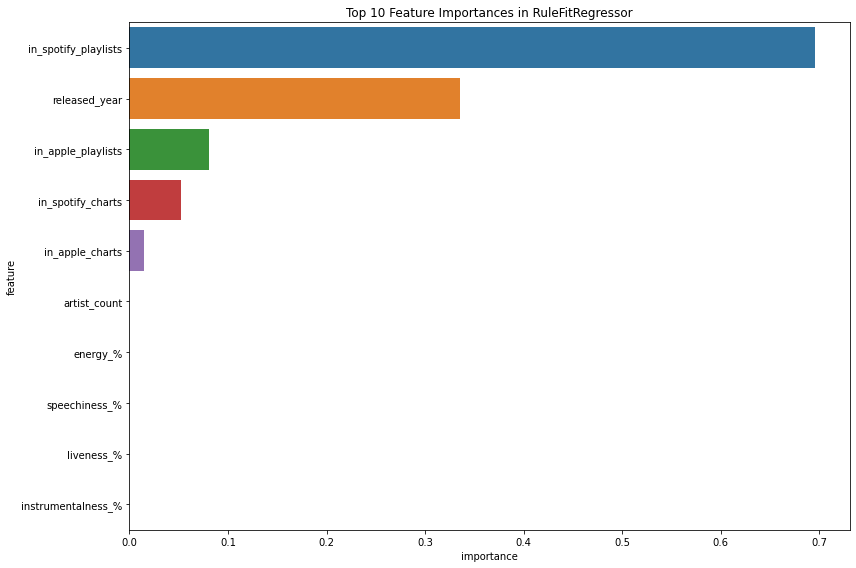

Top 10 Features from RuleFitRegressor:
Feature 1: in_spotify_playlists (Importance: 0.6960)
Feature 2: released_year (Importance: 0.3355)
Feature 3: in_apple_playlists (Importance: 0.0809)
Feature 4: in_spotify_charts (Importance: 0.0520)
Feature 5: in_apple_charts (Importance: 0.0151)
Feature 6: artist_count (Importance: 0.0000)
Feature 7: energy_% (Importance: 0.0000)
Feature 8: speechiness_% (Importance: 0.0000)
Feature 9: liveness_% (Importance: 0.0000)
Feature 10: instrumentalness_% (Importance: 0.0000)


/Users/wilson/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/wilson/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/wilson/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 14 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/wilson/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 17 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/wilson/opt/

Models fitted successfully!

GreedyRuleListClassifier Rules:
Rule 1: {'col': 'released_day_high', 'index_col': 7, 'cutoff': 0.5, 'val': 0.1394736842105263, 'flip': True, 'val_right': 0.868766404199475, 'num_pts': 761, 'num_pts_right': 381}
Rule 2: {'col': 'released_year_low', 'index_col': 2, 'cutoff': 0.5, 'val': 0.09259259259259259, 'flip': True, 'val_right': 0.4107142857142857, 'num_pts': 380, 'num_pts_right': 56}
Rule 3: {'col': 'artist_count_high0', 'index_col': 10, 'cutoff': 0.5, 'val': 0.03550295857988166, 'flip': False, 'val_right': 0.15483870967741936, 'num_pts': 324, 'num_pts_right': 155}
Rule 4: {'col': 'artist_count_high8', 'index_col': 18, 'cutoff': 0.5, 'val': 0.0, 'flip': True, 'val_right': 0.06818181818181818, 'num_pts': 169, 'num_pts_right': 88}
Rule 5: {'val': 0.0, 'num_pts': 81}
Accuracy: 0.8429

BayesianRuleListClassifier Rules:
Rule 1: released_year_low > 0.5 and released_day_high > 0.5
Rule 2: released_day_high > 0.5
Rule 3: released_year_low > 0.5 and in_spotify_p

In [26]:
data = data.dropna(subset=['streams'])

# Log transform the target variable
# A logarithmic transformation is applied to the target variable 'streams' because streaming data usually exhibits a long-tailed distribution
data['log_streams'] = np.log1p(data['streams'])

# Add interaction feature: "is_new_song_by_popular_artist"
data['is_new_song_by_popular_artist'] = ((2023 - data['released_year'] <= 2) & (data['in_spotify_playlists'] > data['in_spotify_playlists'].median())).astype(int)

# Choose 'streams' as the target variable
target_column = 'log_streams'
X = data.drop(['streams', target_column], axis=1)
y = data[target_column]

# Handle non-numeric columns
X = X.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: RuleFitRegressor
rulefit = RuleFitRegressor(random_state=42)
rulefit.fit(X_train, y_train)

# Calculate feature importance based on prediction changes
importances = []
baseline_pred = rulefit.predict(X_train)
for col in X_train.columns:
    X_temp = X_train.copy()
    X_temp[col] = X_temp[col].mean()
    new_pred = rulefit.predict(X_temp)
    importance = np.mean(np.abs(new_pred - baseline_pred))
    importances.append(importance)

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importances in RuleFitRegressor')
plt.tight_layout()
plt.show()

# Print top features
print("Top 10 Features from RuleFitRegressor:")
for i, (_, feature) in enumerate(feature_importance.iterrows(), 1):
    print(f"Feature {i}: {feature['feature']} (Importance: {feature['importance']:.4f})")

# Discretize features for classification models
discretizer = KBinsDiscretizer(n_bins=2, encode='onehot-dense', strategy='quantile')
X_train_disc = discretizer.fit_transform(X_train)
X_test_disc = discretizer.transform(X_test)

# Create feature name mapping
feature_names = []
for feature in X_train.columns:
    feature_names.extend([f"{feature}_low", f"{feature}_high"])

# Bin the target variable
y_median = y.median()
y_binned = (y > y_median).astype(int)
y_train_binned = (y_train > y_median).astype(int)

# Model 2: GreedyRuleListClassifier
greedyrule = GreedyRuleListClassifier(max_depth=5)
greedyrule.fit(X_train_disc, y_train_binned)

# Model 3: BayesianRuleListClassifier
bayesrule = BayesianRuleListClassifier()
bayesrule.fit(X_train_disc, y_train_binned)

print("Models fitted successfully!")

# GreedyRuleListClassifier
print("\nGreedyRuleListClassifier Rules:")
for i, rule in enumerate(greedyrule.rules_):
    rule_str = str(rule)
    for j, name in enumerate(feature_names):
        rule_str = rule_str.replace(f'X{j}', name)
    print(f"Rule {i+1}: {rule_str}")
print(f"Accuracy: {greedyrule.score(X_test_disc, (y_test > y_median).astype(int)):.4f}")

# BayesianRuleListClassifier
print("\nBayesianRuleListClassifier Rules:")
for i, rule in enumerate(bayesrule.rules_):
    rule_str = str(rule)
    for j, name in enumerate(feature_names):
        rule_str = rule_str.replace(f'X_{j}', name)
    print(f"Rule {i+1}: {rule_str}")
print(f"Accuracy: {bayesrule.score(X_test_disc, (y_test > y_median).astype(int)):.4f}")

## For RuleFitRegressor Rules:
* The most important feature is "in_spotify_playlists", which is intuitively consistent with the fact that songs in more playlists are likely to get more streaming play.

## For GreedyRuleListClassifier Rules:
* Rule 1: For songs with fewer Spotify playlist appearances, the probability of success is about 14%; otherwise it is about 87%.
* Rule 2: For songs with a high number of Spotify playlist appearances, the probability of success is about 41% if the year of release is recent; otherwise it is about 9%.
* Rules 3 and 4: relate to the number of artists, but have a relatively small impact.

## For BayesianRuleListClassifier Rules:
* Rule 1: Songs are more likely to be successful if they have an earlier release year and a later release date.
* Rule 2: Songs with later release dates are more likely to be successful.
* Rule 3: Songs with an earlier release year but a high number of appearances in Spotify playlists are more likely to be successful.
* Rule 4: Release year is an important factor.

In [28]:
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 903.9 kB/s eta 0:00:000:00:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [40]:
from graphviz import Digraph

In [41]:
def create_rulefit_visual():
    dot = Digraph(comment='RuleFitRegressor')
    dot.attr(rankdir='LR', size='10,5')

    # Add nodes with different shapes
    dot.node('A', 'Input Data', shape='folder')
    dot.node('B', 'Train Ensemble of Trees', shape='box')
    dot.node('C', 'Extract Rules from Trees', shape='component')
    dot.node('D', 'Generate Linear Features', shape='component')
    dot.node('E', 'Combine Rules and Linear Features', shape='box')
    dot.node('F', 'Fit Regularized Linear Model', shape='box')
    dot.node('G', 'Output Predictions', shape='cds')

    # Add edges
    dot.edge('A', 'B', label='Features')
    dot.edge('B', 'C')
    dot.edge('A', 'D')
    dot.edge('C', 'E')
    dot.edge('D', 'E')
    dot.edge('E', 'F')
    dot.edge('F', 'G')

    # Save the graph
    dot.render('rulefit_visual', format='png', cleanup=True)
    print("RuleFitRegressor visual created: rulefit_visual.png")

# Call the function to create the visual
create_rulefit_visual()


RuleFitRegressor visual created: rulefit_visual.png


In [42]:
def create_greedy_rulelist_visual():
    dot = Digraph(comment='GreedyRuleListClassifier')
    dot.attr(rankdir='LR', size='10,5')

    # Add nodes with different shapes
    dot.node('A', 'Input Data', shape='folder')
    dot.node('B', 'Initialize Empty Rule List', shape='ellipse')
    dot.node('C', 'Search for Best Rule', shape='diamond')
    dot.node('D', 'Add Rule to List', shape='ellipse')
    dot.node('E', 'Remove Covered Instances', shape='box')
    dot.node('F', 'Meet Stopping Criteria?', shape='diamond')
    dot.node('G', 'Output Final Rule List', shape='cds')
    dot.node('H', 'Stop', shape='doublecircle')

    # Add edges
    dot.edge('A', 'B')
    dot.edge('B', 'C')
    dot.edge('C', 'D')
    dot.edge('D', 'E')
    dot.edge('E', 'F')
    dot.edge('F', 'C', label='No')
    dot.edge('F', 'G', label='Yes')
    dot.edge('G', 'H')

    # Save the graph
    dot.render('greedy_rulelist_visual', format='png', cleanup=True)
    print("GreedyRuleListClassifier visual created: greedy_rulelist_visual.png")

# Call the function to create the visual
create_greedy_rulelist_visual()

GreedyRuleListClassifier visual created: greedy_rulelist_visual.png


In [43]:
def create_bayesian_rulelist_visual():
    dot = Digraph(comment='BayesianRuleListClassifier')
    dot.attr(rankdir='LR', size='12,6')

    # Add nodes with different shapes
    dot.node('A', 'Input Data', shape='folder')
    dot.node('B', 'Generate Candidate Rules', shape='box')
    dot.node('C', 'Define Prior Distributions', shape='tab')
    dot.node('D', 'Initialize MCMC Sampling', shape='ellipse')
    dot.node('E', 'Sample Rule Lists', shape='component')
    dot.node('F', 'Compute Posterior Probability', shape='box')
    dot.node('G', 'Update Rule List Samples', shape='ellipse')
    dot.node('H', 'Converged?', shape='diamond')
    dot.node('I', 'Output Probabilistic Rule List', shape='cds')
    dot.node('J', 'Stop', shape='doublecircle')

    # Add edges
    dot.edge('A', 'B')
    dot.edge('B', 'C')
    dot.edge('C', 'D')
    dot.edge('D', 'E')
    dot.edge('E', 'F')
    dot.edge('F', 'G')
    dot.edge('G', 'H')
    dot.edge('H', 'E', label='No')
    dot.edge('H', 'I', label='Yes')
    dot.edge('I', 'J')

    # Save the graph
    dot.render('bayesian_rulelist_visual', format='png', cleanup=True)
    print("BayesianRuleListClassifier visual created: bayesian_rulelist_visual.png")

# Call the function to create the visual
create_bayesian_rulelist_visual()

BayesianRuleListClassifier visual created: bayesian_rulelist_visual.png


## Algorithm Visualizations and Explanations

#### 1. RuleFitRegressor

![RuleFitRegressor Flowchart](rulefit_visual.png)

**Algorithm Workflow:**

1. **Input Data**: The original dataset containing features and the target variable.
2. **Train Ensemble of Trees**: Use the original features to train an ensemble of decision trees, such as Gradient Boosting Trees.
3. **Extract Rules from Trees**: Derive decision rules from the trained trees by extracting the paths leading to leaf nodes.
4. **Generate Linear Features**: Perform linear transformations on the original features to capture linear relationships.
5. **Combine Rules and Linear Features**: Merge the extracted rules and linear features into a new feature set.
6. **Fit Regularized Linear Model**: Use an L1-regularized linear regression model (e.g., Lasso) to fit the new feature set, promoting sparsity and feature selection.
7. **Output Predictions**: Use the trained model to make predictions on new data.

---

#### 2. GreedyRuleListClassifier

![GreedyRuleListClassifier Flowchart](greedy_rulelist_visual.png)

**Algorithm Workflow:**

1. **Input Data**: The training dataset with features and labels.
2. **Initialize Empty Rule List**: Start with an empty list to hold the classification rules.
3. **Search for Best Rule**: Identify the rule that best separates the classes based on a chosen metric (e.g., information gain).
4. **Add Rule to List**: Append the selected rule to the rule list.
5. **Remove Covered Instances**: Exclude instances correctly classified by the new rule from the dataset.
6. **Meet Stopping Criteria?**

   - **No**: Return to step 3 with the remaining data.
   - **Yes**: Proceed to the next step.

7. **Output Final Rule List**: Generate the ordered list of rules for classification.
8. **Stop**: The algorithm terminates.

---

#### 3. BayesianRuleListClassifier

![BayesianRuleListClassifier Flowchart](bayesian_rulelist_visual.png)

**Algorithm Workflow:**

1. **Input Data**: The training dataset containing features and labels.
2. **Generate Candidate Rules**: Create a set of potential rules using methods like frequent itemset mining.
3. **Define Prior Distributions**: Establish prior probabilities for aspects of the rule list, such as its length and the complexity of rules.
4. **Initialize MCMC Sampling**: Begin the Markov Chain Monte Carlo (MCMC) sampling process.
5. **Sample Rule Lists**: Randomly sample possible rule lists from the candidate rules.
6. **Compute Posterior Probability**: Calculate the posterior probability of each sampled rule list given the data.
7. **Update Rule List Samples**: Use the posterior probabilities to decide whether to accept or reject sampled rule lists, updating the Markov chain.
8. **Converged?**

   - **No**: Return to step 5 to continue sampling.
   - **Yes**: Proceed to the next step.

9. **Output Probabilistic Rule List**: Produce a rule list that reflects the posterior distribution over possible rule lists.
10. **Stop**: The algorithm concludes.

---

